# Atractor de Lorenz

## Introducción

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/XZ7Ly7dDCzo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# Modelo matemático.

En 1963 Edward Lorenz definió un sistema dinámico determinista tridimensional no lineal, el cual derivó de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la **atmósfera terrestre**. 

Este sistema presenta un comportamiento caótico y suele aparecer también en otros fenómenos físicos como láseres, generadores eléctricos, entre otros. Consiste de tres ecuaciones diferenciales ordinarias (EDO) que se escriben como sigue:

$$
\begin{eqnarray}
\dfrac{dx}{dt} & = & \sigma(y − x),\\
\dfrac{dy}{dt} & = & x(\rho − z) − y,\\
\dfrac{dz}{dt} & = & xy − \beta z
\end{eqnarray}
$$

donde $\sigma$ es conocido como el número de Prandtl y $\rho$ el número de Rayleigh. Ambos son parámetros adimensionales que definen el movimiento convectivo en la atmósfera.

Usualmente $\sigma = 10$, $\beta = 8/3$, $\rho$ es variado. El sistema exhibe un comportamiento caótico para $\rho = 28$, pero muestra órbitas periódicas para otros valores de b; por ejemplo, con $\rho = 99, 96$ se convierte en un nudo tórico llamado. Se debe cumplir que $\sigma, \beta, \rho > 0$.

Dadas las condiciones iniciales, la solución de este sistema define trayectorias cuya forma recuerdan a una mariposa; de aquí que el atractor de Lorenz puede haber inspirado el nombre del efecto mariposa en la teoría del caos

<table style="width:100%">
  <tr>
    <td style="text-align:center"><video src="../utils/figs/lorenz.mp4" width="320" controls></video></td>
  </tr>
</table>

donde a es llamado el número de Prandtl y b se llama el número de Rayleigh.



## Modelo numérico

El sistema de ecuaciones puede ser resuelto numéricamente dadas unas posiciones iniales.

In [43]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import time
import macti.visual
#from macti.evaluacion import Evalua
#ȩ = Evalua('MetodoEuler')

In [2]:
def Euler(x, dt, f):
    return x + dt * f#(x)

In [3]:
def lorenz_deriv(x_y_z, 𝜎=10.0, 𝛽=8./3, 𝜌=28.0):
    '''
    Cálculo de las ecuaciones de Lorenz
    '''
    x, y, z = x_y_z
    return [𝜎 * (y - x), 
            x * (𝜌 - z) - y, 
            x * y - 𝛽 * z]

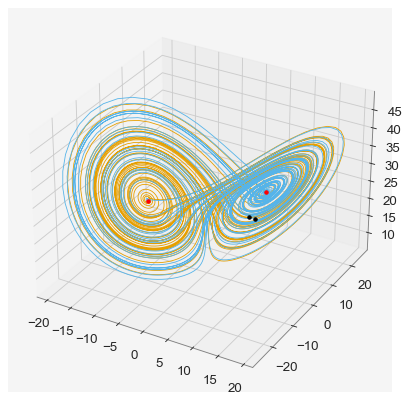

In [14]:
N = 2 # Número de trayectorias en el espacio fase    
Nt = 5000 # Número total de pasos
dt = 0.01 # Stepsize

#Posiciones iniciales aleatorias
#np.random.seed(1)
#x0 = -15 + 30 * np.random.random((N, 3))

x0 = np.array([[ 5.98168845,  9.14898233, 18.04053198],
               [ 5.28839638,  7.82341498, 19.0658776 ]])

#Trayectoria
trace = np.zeros((N, 3, Nt))

fig = plt.figure();
ax = fig.add_axes([0, 0, 1, 1], projection='3d');
ax.plot(x0[:,0], x0[:,1], x0[:,2], '.', zorder=5) # condicion inicial

trace[:, :, 0] = x0

# Solución de las ecs. de Lorenz usando el método de Euler
for t in range(Nt):
    fx = np.asarray([lorenz_deriv(x) for x in x0])
    x0 = x0 + dt * fx
    trace[:,:,t] = x0[:,:]
#    ax.plot(x0[:,0], x0[:,1], x0[:,2], '.')

for i in range(N):
    ax.plot(trace[i,0,:], trace[i,1,:], trace[i,2,:], '-', lw='0.75')
    
ax.plot(trace[:,0,-1], trace[:,1,-1], trace[:,2,-1], 'r.',zorder=5) # condicion inicial
plt.show()

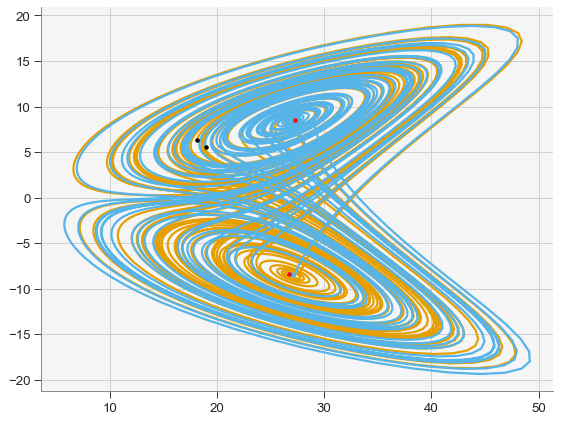

In [18]:
fig = plt.figure();
ax = fig.add_axes([0, 0, 1, 1]);
ax.plot(trace[:,2,0], trace[:,0,0], '.',zorder=5) # condicion inicial

for i in range(N):
    ax.plot(trace[i,2,:], trace[i,0,:], '-', lw=2.0)
    
ax.plot(trace[:,2,-1], trace[:,0,-1], 'r.',zorder=5) # condicion inicial
plt.show()

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gIwvFMiJNVU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [120]:
def efecto_mariposa(Nt=1000, dt = 0.001, 𝜎=10.0, 𝛽=8./3, 𝜌=28.0,angle=30):
    N = 2 # Número de trayectorias en el espacio fase    
#    Nt = 5000 # Número total de pasos
#    dt = 0.001 # Stepsize

    x0 = np.array([[ 5.98168845,  9.14898233, 18.04053198],
                   [ 5.28839638,  7.82341498, 19.0658776 ]])

    #Trayectoria
    trace = np.zeros((N, 3, Nt))
    trace[:, :, 0] = x0

    # Solución de las ecs. de Lorenz usando el método de Euler
    for t in range(Nt):
        fx = np.asarray([lorenz_deriv(x, 𝜎, 𝛽, 𝜌) for x in x0])
        x0 = x0 + dt * fx
        trace[:,:,t] = x0[:,:]

    # Set up a figure twice as tall as it is wide
    fig = plt.figure(figsize=(8,4))
    fig.suptitle('El efecto mariposa')

    # First subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(30, angle)
    ax.plot(trace[:,0,0], trace[:,1,0], trace[:,2,0], '.', zorder=5) # condicion inicial
    colores = ['green','orange']
    for i in range(N):
        ax.plot(trace[i,0,:], trace[i,1,:], trace[i,2,:], '-', c = colores[i], lw='0.75')
    
    ax.plot(trace[:,0,-1], trace[:,1,-1], trace[:,2,-1], 'r.',zorder=5) # condicion inicial
        
    # Second subplot
    ax = fig.add_subplot(1, 2, 2, aspect='equal')
    ax.plot(trace[:,0,0], trace[:,2,0], '.', zorder=5) # condicion inicial
    
    for i in range(N):
        ax.plot(trace[i,0,:], trace[i,2,:], '-', c = colores[i], lw='0.75')
    
    ax.plot(trace[:,0,-1], trace[:,2,-1], 'r.',zorder=5) # condicion inicial
    
    plt.tight_layout()
    plt.show()
    

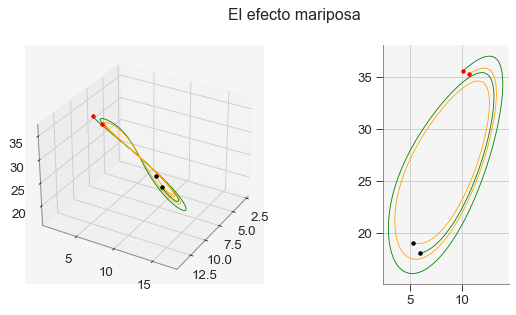

In [121]:
efecto_mariposa(Nt=1000, 𝜎=10.0, 𝛽=8./3, 𝜌=28)

In [124]:
widgets.interactive(efecto_mariposa,
             Nt = widgets.IntSlider(min=0, max=10000, step=100, value=1000), 
             dt = widgets.FloatSlider(min=0.001, max=0.010, step=0.001, value=0.001),
             𝜎=widgets.fixed(10.0), 
             𝛽=widgets.fixed(8./3),
             𝜌=widgets.FloatSlider(min=28, max=99, step=10, value=99),
             angle=widgets.FloatSlider(min=0, max=90, step=2, value=30))

interactive(children=(IntSlider(value=1000, description='Nt', max=10000, step=100), FloatSlider(value=0.001, d…